In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Datasets/train.csv")
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
df.shape

(30000, 24)

In [4]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [5]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [44]:
df.dropna(how='all', inplace=True)

In [46]:
df.dropna(subset=['Loan Sanction Amount (USD)'], inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30000.0,40.092300,16.045129,18.00,25.0000,40.000,55.0000,65.00
Income (USD),25424.0,2630.574417,11262.723830,377.70,1650.4575,2222.435,3090.5925,1777460.21
Loan Amount Request (USD),30000.0,88826.333855,59536.949605,6048.24,41177.7550,75128.075,119964.6050,621497.82
Current Loan Expenses (USD),29828.0,400.936876,242.545375,-999.00,247.6675,375.205,521.2925,3840.88
Dependents,27507.0,2.253027,0.951162,1.00,2.0000,2.000,3.0000,14.00
Credit Score,28297.0,739.885381,72.163846,580.00,681.8800,739.820,799.1200,896.26
No. of Defaults,30000.0,0.193933,0.395384,0.00,0.0000,0.000,0.0000,1.00
Property ID,30000.0,501.934700,288.158086,1.00,251.0000,504.000,751.0000,999.00
Property Age,25150.0,2631.119440,11322.677000,377.70,1650.4500,2223.250,3091.4075,1777460.21
Property Type,30000.0,2.460067,1.118562,1.00,1.0000,2.000,3.0000,4.00


In [7]:
df['Property Price'].replace(-999.00, np.nan)
df['Loan Sanction Amount (USD)'].replace(-999.00, np.nan)

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

In [8]:
df.drop(columns=['Customer ID', 'Property ID'], inplace=True, axis=1)

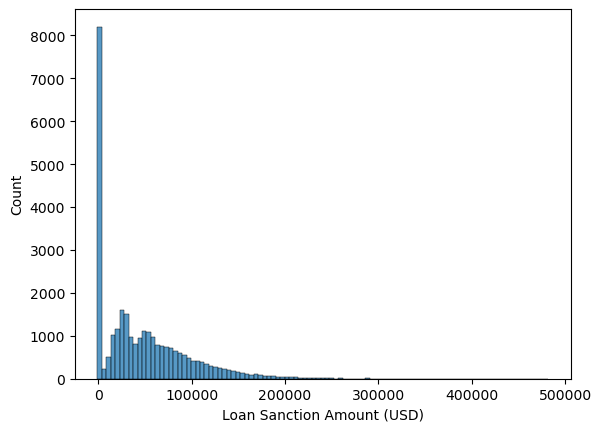

In [9]:
sns.histplot(df['Loan Sanction Amount (USD)'])
plt.savefig('Screenshots/Loan_amount_histplot.png')

In [62]:
print("Target Value - Zero vs Non-zero")
zero_count=len(df[df['Loan Sanction Amount (USD)']==0])
print("Loan Amount is Zero for", zero_count*100/len(df), " %")
non_zero_count=len(df[df['Loan Sanction Amount (USD)']>0])
print("Loan Amount is Non-Zero for", non_zero_count*100/len(df), " %")

Target Value - Zero vs Non-zero
Loan Amount is Zero for 26.517194875252866  %
Loan Amount is Non-Zero for 72.34322319622387  %


In [10]:
df['Location'].value_counts()

Location
Semi-Urban    21563
Rural          5338
Urban          3099
Name: count, dtype: int64

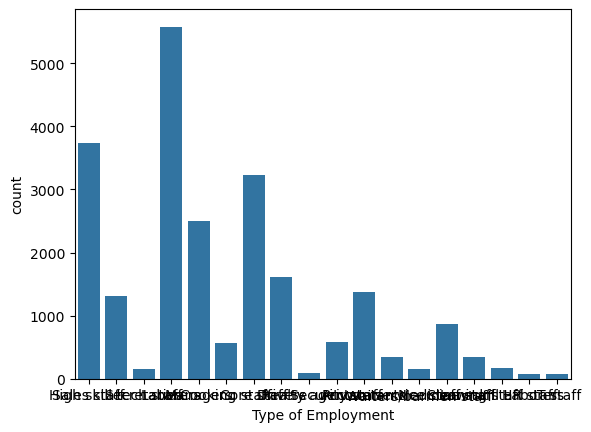

In [11]:
sns.countplot(x="Type of Employment", data=df)
plt.savefig('Screenshots/type_of_employ_countplot.png')

In [12]:
df['Type of Employment'].value_counts()

Type of Employment
Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: count, dtype: int64

In [13]:
df['Profession'].value_counts()

Profession
Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: count, dtype: int64

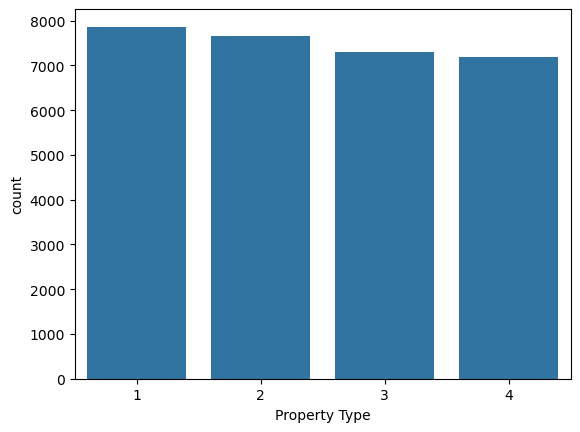

In [14]:
sns.countplot(x='Property Type', data=df)
plt.savefig('Screenshots/Property_type_countplot.png')

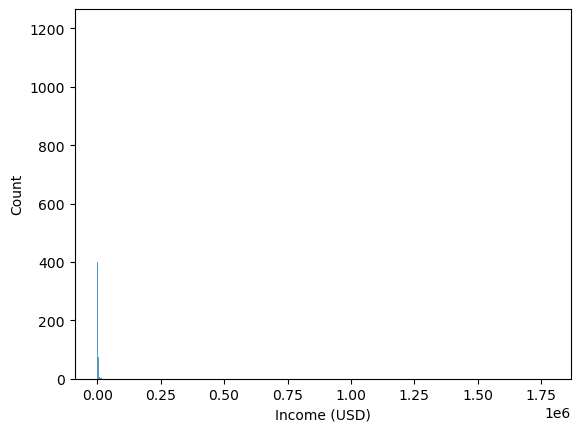

In [42]:
sns.histplot(df['Income (USD)'])
plt.savefig('Screenshots/income_amount_histplot.png')

In [48]:
from sklearn.model_selection import train_test_split
Y=df['Loan Sanction Amount (USD)']
X=df.drop('Loan Sanction Amount (USD)', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, random_state=42, test_size=0.2)
print(f"Test Size: {len(X_test)}")

Test Size: 5932


In [17]:
num_cols=list(X.select_dtypes(include=['int64', 'float64']).columns)
cat_cols=list(X.select_dtypes(include=['object']).columns)
print("Numerical Columns: ",'\n', num_cols)

Numerical Columns:  
 ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant', 'Property Price']


In [18]:
df.dtypes

Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop' 
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [26]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Income (USD)',
                                                   'Loan Amount Request (USD)',
                                                   'Current Loan Expenses '
                                                   '(USD)',
                                                   'Dependents', 'Credit Score',
                                                   'No. of Defaults',
                                                   'Property Age',
                                                   'Property Type',
                                                   'Co-Applicant',
                                                   'Property Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Name', 'Gender',
                                                   'Income Stability',
                                                   'Profession',
                                                   'Type of Employment',
                                                   'Location', 'Expense Type 1',
                                                   'Expense Type 2',
                                                   'Has Active Credit Card',
                                                   'Property Location'])]))])

In [50]:
X_train_prep=model_pipeline.fit_transform(X_train)

In [66]:
X_test_prep=model_pipeline.transform(X_test)

In [54]:
X_train_prep[:5]

array([[9.36170213e-01, 4.31392462e-04, 4.36737576e-02, 2.34627718e-01,
        0.00000000e+00, 8.70707646e-01, 0.00000000e+00, 4.31392462e-04,
        6.66666667e-01, 1.00000000e+00, 4.37241403e-02, 8.61100000e+03,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 8.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [2.97872340e-01, 2.13566336e-03, 6.36834029e-03, 2.22660479e-01,
        0.00000000e+00, 9.55384810e-01, 0.00000000e+00, 2.13566336e-03,
        1.00000000e+00, 1.00000000e+00, 1.61041062e-02, 9.38800000e+03,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.00000000e+00],
       [9.78723404e-01, 2.09750531e-03, 4.36185119e-01, 4.10235378e-01,
        0.00000000e+00, 5.06070146e-01, 0.00000000e+00, 2.09750531e-03,
        3.33333333e-01, 1.00000000e+00, 4.69952957e-01, 2.08640000e+04,
        0.0000

In [ ]:
sns.pairplot(df)

In [36]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import root_mean_squared_error, r2_score

In [74]:
linreg.fit(X_train_prep, y_train)
y_pred=linreg.predict(X_test_prep)
#__________________________
print("Linear Regression MSE: ",  mean_squared_error(y_test, y_pred))
print("Linear Regression MAE: ", mean_absolute_error(y_test, y_pred))
print("Linear Regression RMSE: ", root_mean_squared_error(y_test, y_pred))
print("Linear Regression R2 Score: ", r2_score(y_test, y_pred))

Linear Regression MSE:  2534562674.152653
Linear Regression MAE:  24336.659782688348
Linear Regression RMSE:  50344.44034997959
Linear Regression R2 Score:  -0.11665833427601413


In [102]:
from sklearn.model_selection import GridSearchCV
def best_model_metrics(metrics_df, model_name, model, param_grid):
    search=GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   cv=5,
                   scoring='r2',
                   n_jobs=-1
                   )
    search.fit(X_train_prep, y_train)
    print(f"Best Parameters of {model_name}: ")
    print(search.best_params_)
    model=search.best_estimator_
    model.fit(X_train_prep, y_train)
    y_pred=model.predict(X_test_prep)
    t=y_test
    p=y_pred
    length=len(metrics_df)
    metrics_df.loc[length+1]=([model_name, mean_squared_error(t, p), mean_absolute_error(t,p), root_mean_squared_error(t,p), r2_score(t,p)])

In [76]:
from sklearn import linear_model
lasso=linear_model.Lasso()
lasso

Lasso()

In [78]:
cols=['model', 'MSE', 'MAE', 'RMSE', 'r2 score']
best_metrics = pd.DataFrame(columns=cols)

In [104]:
param_grid={
    "alpha":[0.001, 0.01, 0.1, 10]
}
best_model_metrics(best_metrics, "Lasso Regression", lasso, param_grid)

Best Parameters of Lasso Regression: 
{'alpha': 10}


In [108]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge

Ridge()

In [110]:
param_grid={
    "alpha":[0.001, 0.01, 10, 100]
}
best_model_metrics(best_metrics, "Ridge Regression", ridge, param_grid)

Best Parameters of Ridge Regression: 
{'alpha': 0.01}


In [112]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic

ElasticNet()

In [114]:
param_grid={
    "alpha":[0.001, 0.1, 1, 10],
    "l1_ratio":[0.2, 0.5, 0.8]
}
best_model_metrics(best_metrics, "Elastic Net", elastic, param_grid)

Best Parameters of Elastic Net: 
{'alpha': 0.001, 'l1_ratio': 0.8}


In [116]:
best_metrics

,model,MSE,MAE,RMSE,r2 score
1,Lasso Regression,1.016438e+09,22271.763988,31881.622498,0.552186
2,Ridge Regression,1.017701e+09,21926.093710,31901.428436,0.551629
3,Elastic Net,1.015707e+09,22117.575936,31870.163657,0.552507
